### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 02 - Regressão e Ajuste de Curvas - *Real estate valuation dataset* </b>

The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples). (https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set)

In [1]:
#Bibliotecas Utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()
Y = data.iloc[:, -1].to_numpy()

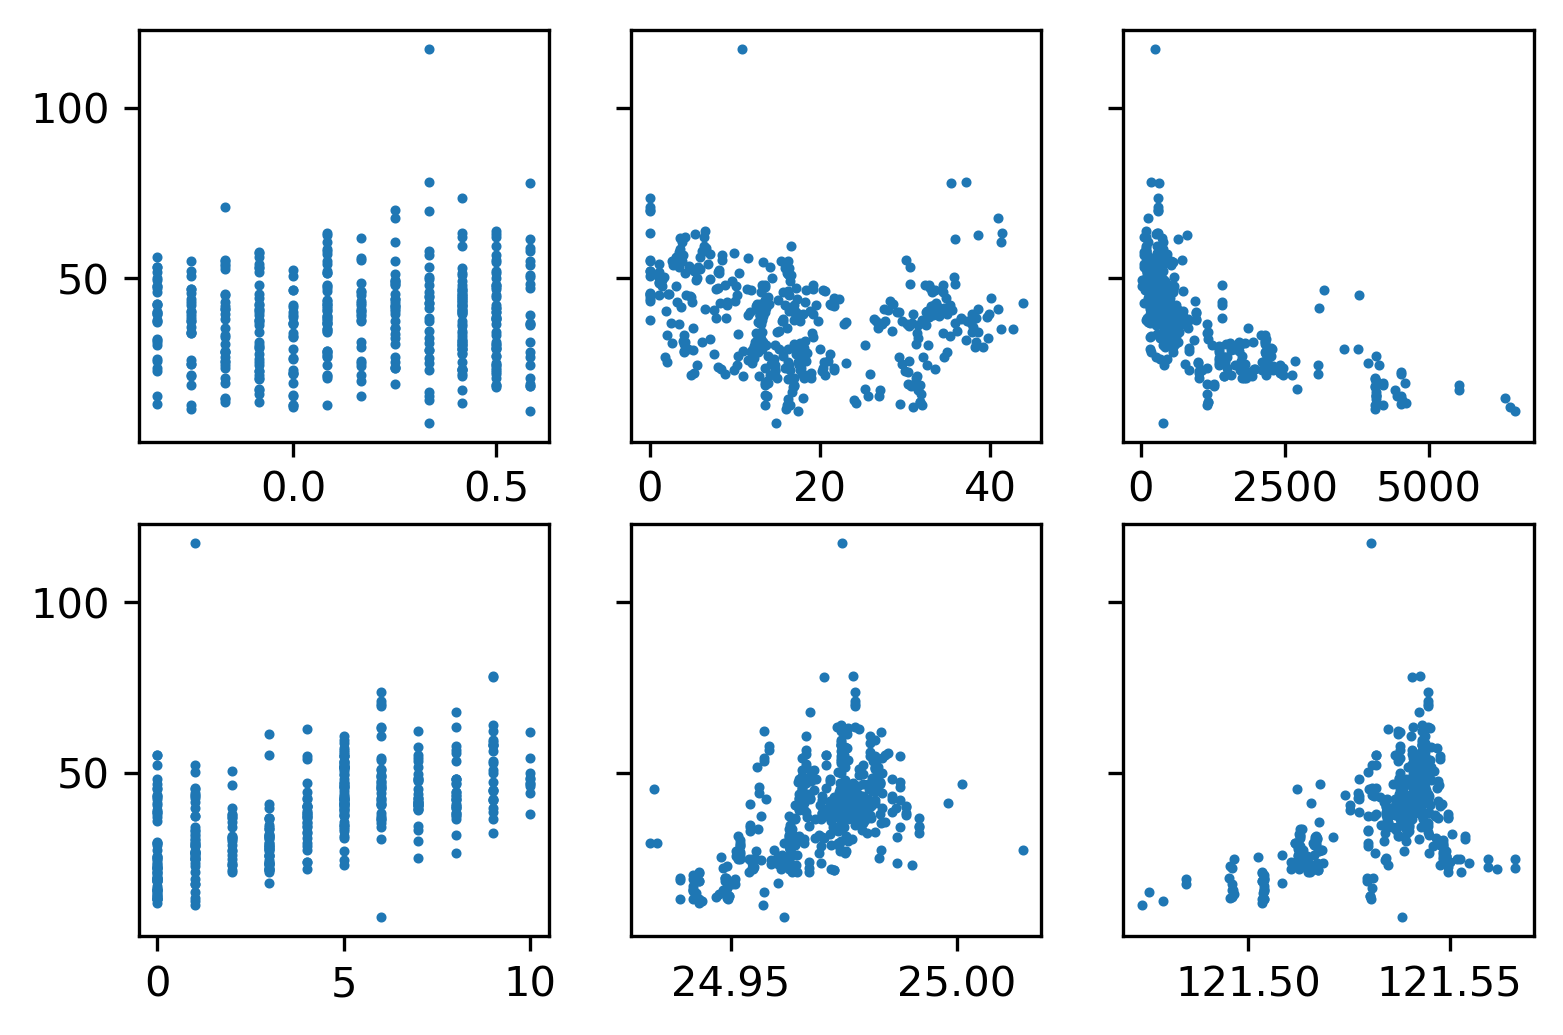

In [37]:
fig, axs = plt.subplots(2,3, dpi = 300, sharey = True)
axs[0,0].scatter(X[:,0], Y, s = 2)
axs[0,1].scatter(X[:,1], Y, s = 2)
axs[0,2].scatter(X[:,2], Y, s =2)
axs[1,0].scatter(X[:,3], Y, s = 2)
axs[1,1].scatter(X[:,4], Y, s = 2)
axs[1,2].scatter(X[:,5], Y, s = 2)


In [47]:
cov_matrix = np.cov(X.T)
df_cov = pd.DataFrame(cov_matrix, columns = ["X1","X2","X3","X4","X5","X6"], index = ["X1","X2","X3","X4","X5","X6"])
df_cov

,X1,X2,X3,X4,X5,X6
X1,0.079521,0.056357,2.166777e+01,0.007928,0.000123,-0.000178
X2,0.056357,129.788704,3.684082e+02,1.664189,0.007694,-0.008483
X3,21.667774,368.408249,1.592921e+06,-2239.938319,-9.257892,-15.618216
X4,0.007928,1.664189,-2.239938e+03,8.676334,0.016236,0.020302
X5,0.000123,0.007694,-9.257892e+00,0.016236,0.000154,0.000079
X6,-0.000178,-0.008483,-1.561822e+01,0.020302,0.000079,0.000236


##### Regressão Linear Múltipla de Mínimos Quadrados

In [203]:
def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef

def std_data(x):

    std_x = (x - x.mean(axis = 0, keepdims = True))/x.std(axis = 0, keepdims = True, ddof = 1)

    return std_x

data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()

Y = data.iloc[:, -1].to_numpy()
X = std_data(X)
Y = std_data(Y)
# rand_index = np.random.permutation(X.shape[0])
# X = X[rand_index,:]
# Y = Y[rand_index]

spt_point = int(2/3*X.shape[0])
X_train = X[:spt_point,:]
Y_train = Y[:spt_point]

X_test = X[spt_point:,:]
Y_test = Y[spt_point:]

#All dataset
X = np.c_[np.ones(X.shape[0]), X]
M = np.linalg.lstsq(X, Y, rcond = -1)[0]

Y_pred = np.dot(X, M)

print("R2 = {:.3f}".format(R2(Y, Y_pred, X.shape[0], X.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y, Y_pred, X.shape[0], X.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y, Y_pred)))

#Comparative Case

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
M_train = np.linalg.lstsq(X_train, Y_train, rcond = -1)[0]

Y_train_pred = np.dot(X_train, M_train)

print("R2 = {:.3f}".format(R2(Y_train, Y_train_pred, X_train.shape[0], X_train.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y_train, Y_train_pred, X_train.shape[0], X_train.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y_train, Y_train_pred)))
#Targete Case

X_test = np.c_[np.ones(X_test.shape[0]), X_test]
M_test = np.linalg.lstsq(X_test, Y_test, rcond = -1)[0]

Y_test_pred = np.dot(X_test, M_test)

print("R2 = {:.3f}".format(R2(Y_test, Y_test_pred, X_test.shape[0], X_test.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y_test, Y_test_pred, X_test.shape[0], X_test.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y_test, Y_test_pred)))

R2 = 0.582
R2 ajustado = 0.576
RMSE = 0.645
R2 = 0.580
R2 ajustado = 0.571
RMSE = 0.672
R2 = 0.607
R2 ajustado = 0.589
RMSE = 0.575


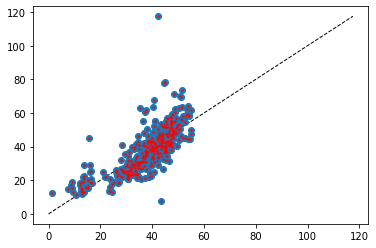

In [97]:
fig, ax = plt.subplots()
ax.scatter(Y_mod, Y, zorder = 2)
ax.scatter(Y_m, Y, zorder = 2, s = 1.5, c = "red")
ax.plot(np.linspace(0, Y.max()), np.linspace(0, Y.max()), c = "black", lw = 1, ls = "--", zorder = 1)

##### Extreme Learning Machine

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

def act_fun(u, fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

def norm_data(x):

    for i in range(x.shape[1]):
        x[:,i] = x[:,i]/x[:,i].max()
        
    #x_norm = 2*((x - x.min())/(x.max() - x.min()) - 1
    return x

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef
data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()

Y = data.iloc[:, -1].to_numpy()

X = norm_data(X)
Y = norm_data(np.expand_dims(Y,1))

fun_type = "log"
Nr = 10
q = 5
# eta = 0.6
# Ne = 1500
RMSE_r = []
R2_r = []
R2aj_r = []
tx_ok_20 = []
tx_ok_10 = []

best_dict = {
    "tx_ok_10":0,
    "tx_ok_20":0,
    "y_pred": 0,
    "y_true": 0,
    "RMSE": 0,
    "R2": 0,
    "R2_aj": 0
}
tic = time.perf_counter()
for r in range(Nr):
    rand_index = np.random.permutation(X.shape[0])

    X = X[rand_index,:]
    Y = Y[rand_index]

    spt_point = int(2/3*X.shape[0])
    X_train = X[:spt_point,:]
    Y_train = Y[:spt_point]

    X_test = X[spt_point:,:]
    Y_test = Y[spt_point:]

    W = np.random.normal(loc = 0, scale = 0.1, size = (q, X.shape[1]+1))

    Z = []

    for i in range(X_train.shape[0]):
        x = np.append(-1, X_train[i,:])
        U = np.dot(W, x)
        z = act_fun(U, fun_type)
        z = np.append(-1, z)
        Z.append(z)
    Z = np.array(Z)
    M = np.dot(np.linalg.pinv(Z), Y_train)

    count_20 = 0
    count_10 = 0
    y_pred = []
    EQM = 0
    for j in range(X_test.shape[0]):
        x = np.append(-1, X_test[j,:])
        U1 = np.dot(W, x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        y = np.dot(z, M)
        y_pred.append(y)
        EQM = EQM + 0.5*sum(np.power(Y_test[j] - y,2))
        if np.abs(Y_test[j] - y) <= 0.2*np.abs(Y_test[j]):
            count_20 += 1
        if np.abs(Y_test[j] - y) <= 0.1*np.abs(Y_test[j]):
            count_10 += 1
    y_pred = np.array(y_pred)

    RMSE_r.append(np.power(EQM, 0.5)[0])
    R2_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0])
    R2aj_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1])
    tx_ok_20.append(count_20/X_test.shape[0])
    tx_ok_10.append(count_10/X_test.shape[0])

    if (best_dict["tx_ok_10"] <= count_10/X_test.shape[0]) & (best_dict["tx_ok_20"] <= count_20/X_test.shape[0]):
        best_dict["y_pred"] = y_pred
        best_dict["y_true"] = Y_test
        best_dict["R2"] = R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0]
        best_dict["R2_aj"] = R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1]
        best_dict["RMSE"] = np.power(EQM, 0.5)[0]
        best_dict["tx_ok_10"] = count_10/X_test.shape[0]
        best_dict["tx_ok_20"] = count_20/X_test.shape[0]
        
    # print("Rodada {} - Taxa de acerto para uma taxa de erro admssível de 20% = {:.2%}".format(r+1, count_20/X_test.shape[0]))
    # print("Rodada {} - Taxa de acerto para uma taxa de erro admssível de 10% = {:.2%}".format(r+1, count_10/X_test.shape[0]))
    # print("Rodada: {}, R2 = {:.3f}".format(r+1, R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0]))
    # print("Rodada: {}, R2_aj = {:.3f}".format(r+1, R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1]))
    # print("Rodada: {}, RMSE = {:.3f}\n".format(r+1, np.power(EQM,0.5)[0]))
toc = time.perf_counter()

print("\n###### Resumo das {} Rodadas ######".format(Nr))
print("Taxa de acerto para uma taxa de erro admssível de 20%:\nMédia = {:.2%}, Desv. Pad. = {:.2%}, Máximo = {:.2%}, Mínimo = {:.2%}".format(
    np.mean(tx_ok_20), np.std(tx_ok_20), np.max(tx_ok_20), np.min(tx_ok_20)))
print("\nTaxa de acerto para uma taxa de erro admssível de 10%:\nMédia = {:.2%}, Desv. Pad. = {:.2%}, Máximo = {:.2%}, Mínimo = {:.2%}".format(
    np.mean(tx_ok_10), np.std(tx_ok_10), np.max(tx_ok_10), np.min(tx_ok_10)))
print("\nR2:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2_r), np.std(R2_r), np.max(R2_r), np.min(R2_r)))
print("\nR2_aj:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2aj_r), np.std(R2aj_r), np.max(R2aj_r), np.min(R2aj_r)))
print("\nRMSE:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(RMSE_r), np.std(RMSE_r), np.max(RMSE_r), np.min(RMSE_r)))

print("\n###### Melhor Rodada em relação as taxas de acerto para erros de 10% e 20% ######")
print("Taxa de acerto para uma taxa de erro admssível de 20% = {:.2%}".format(best_dict["tx_ok_20"]))
print("Taxa de acerto para uma taxa de erro admssível de 10% = {:.2%}".format(best_dict["tx_ok_10"]))
print("R2 = {:.3f}".format(best_dict["R2"]))
print("R2_aj = {:.3f}".format(best_dict["R2_aj"]))
print("RMSE = {:.3f}".format(best_dict["RMSE"]))

print("\nTempo de Calibração e Validação = {:.3f} segundos, Rodadas = {}".format(toc - tic, Nr))



###### Resumo das 10 Rodadas ######
Taxa de acerto para uma taxa de erro admssível de 20%:
Média = 68.99%, Desv. Pad. = 3.30%, Máximo = 74.64%, Mínimo = 63.77%

Taxa de acerto para uma taxa de erro admssível de 10%:
Média = 40.80%, Desv. Pad. = 3.82%, Máximo = 47.83%, Mínimo = 34.78%

R2:
Média = 0.559, Desv. Pad. = 0.067, Máximo = 0.664, Mínimo = 0.436

R2_aj:
Média = 0.542, Desv. Pad. = 0.070, Máximo = 0.652, Mínimo = 0.414

RMSE:
Média = 9.897, Desv. Pad. = 0.573, Máximo = 11.108, Mínimo = 9.295

###### Melhor Rodada em relação as taxas de acerto para erros de 10% e 20% ######
Taxa de acerto para uma taxa de erro admssível de 20% = 74.64%
Taxa de acerto para uma taxa de erro admssível de 10% = 47.83%
R2 = 0.664
R2_aj = 0.652
RMSE = 10.147

Tempo de Calibração e Validação = 0.538 segundos, Rodadas = 10


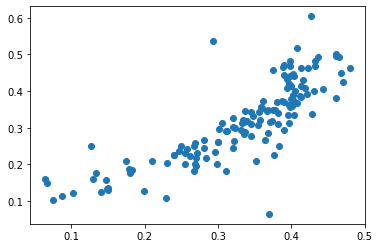

In [36]:
fig, ax = plt.subplots()
ax.scatter(best_dict["y_pred"], best_dict["y_true"])

##### MLP

q = 5, eta = 0.6, 76.1%

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import namedtuple
import time

def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)), dtype = "float")
        du = u*(1-u)
    return (action_fun(f = u, df = du))

def norm_data(x):

    for i in range(x.shape[1]):
        x[:,i] = x[:,i]/x[:,i].max()
        # x[:,i] = 2*((x[:,i] - x[:,i].min())/(x[:,i].max() - x[:,i].min())) - 1
        #x_norm = 2*((x - x.min())/(x.max() - x.min()) - 1
    return x

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X_real = data.iloc[:, 0:6].to_numpy()

Y_real = data.iloc[:, -1].to_numpy()

X = norm_data(X_real)
Y = norm_data(np.expand_dims(Y_real,1))

fun_type = "log"
Nr = 10
q = 5
eta = 0.6
Ne = 1500
mon = 0.75

RMSE_r = []
R2_r = []
R2aj_r = []
tx_ok_20 = []
tx_ok_10 = []

best_dict = {
    "tx_ok_10":0,
    "tx_ok_20":0,
    "y_pred": 0,
    "y_true": 0,
    "RMSE": 0,
    "R2": 0,
    "R2_aj": 0
}

tic = time.perf_counter()
EQM_train_r = []

for r in range(Nr):
    rand_index = np.random.permutation(X.shape[0])

    X = X[rand_index,:]
    Y = Y[rand_index]

    spt_point = int(2/3*X.shape[0])
    X_train = X[:spt_point,:]
    Y_train = Y[:spt_point,:]

    X_test = X[spt_point:,:]
    Y_test = Y[spt_point:,:]

    W = {
        0: np.random.rand(q, X_train.shape[1]+1)*0.01,
        1: np.random.rand(Y_train.shape[1], q+1)*0.01
    }
    W_old = W.copy()
    EQM_train = []
    for e in range(Ne):
        rand_index = np.random.permutation(X_train.shape[0])
        X_train = X_train[rand_index,:]
        Y_train = Y_train[rand_index,:]
        
        EQM = 0

        for i in range(X_train.shape[0]):
            x = np.append(-1, X_train[i,:])
            U1 = np.dot(W[0], x)
            z, dz = act_fun(U1, fun_type)
            z = np.append(-1, z)
            U2 = np.dot(W[1], z)
            y, dy = act_fun(U2, fun_type)

            err = Y_train[i,:] - y
            EQM = EQM + 0.5*np.power(err,2).sum()
            
            err = np.expand_dims(Hardamad_Prod(err, dy), 1)
            x = np.expand_dims(x,1)
            z = np.expand_dims(z,1)

            DDi = Hardamad_Prod(dz, np.dot(W[1][:,1:].T, err))

            W[0] = W[0] + eta*np.dot(DDi, x.T) + mon*(W[0] - W_old[0])
            W[1] = W[1] + eta*np.dot(err, z.T) + mon*(W[1] - W_old[1])
            W_old = W.copy()

        EQM_train.append(EQM)
    EQM_train_r.append(EQM_train)

    EQM_test = 0
    count_20 = 0
    count_10 = 0
    y_pred = []
    for j in range(X_test.shape[0]):
        x = np.append(-1, X_test[j,:])
        U1 = np.dot(W[0],x)
        z = act_fun(U1, fun_type).f
        z = np.append(-1, z)
        U2 = np.dot(W[1], z)
        y = act_fun(U2, fun_type).f
        y_pred.append(y)
        err = Y_test[j,:] - y

        EQM_test = EQM_test + 0.5*np.power(err,2).sum()
        if np.abs(err) <= 0.2*np.abs(Y_test[j,:]):
            count_20 += 1
        if np.abs(err) <= 0.1*np.abs(Y_test[j,:]):
            count_10 += 1
    
    RMSE_r.append(np.power(EQM_test, 0.5))
    R2_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0])
    R2aj_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1])
    tx_ok_20.append(count_20/X_test.shape[0])
    tx_ok_10.append(count_10/X_test.shape[0])

    if (best_dict["tx_ok_10"] <= count_10/X_test.shape[0]) & (best_dict["tx_ok_20"] <= count_20/X_test.shape[0]):
        best_dict["y_pred"] = y_pred
        best_dict["y_true"] = Y_test
        best_dict["R2"] = R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0]
        best_dict["R2_aj"] = R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1]
        best_dict["RMSE"] = np.power(EQM_test, 0.5)
        best_dict["tx_ok_10"] = count_10/X_test.shape[0]
        best_dict["tx_ok_20"] = count_20/X_test.shape[0]

toc = time.perf_counter()

print("\n###### Resumo das {} Rodadas ######".format(Nr))
print("Taxa de acerto para uma taxa de erro admssível de 20%:\nMédia = {:.2%}, Desv. Pad. = {:.2%}, Máximo = {:.2%}, Mínimo = {:.2%}".format(
    np.mean(tx_ok_20), np.std(tx_ok_20), np.max(tx_ok_20), np.min(tx_ok_20)))
print("\nTaxa de acerto para uma taxa de erro admssível de 10%:\nMédia = {:.2%}, Desv. Pad. = {:.2%}, Máximo = {:.2%}, Mínimo = {:.2%}".format(
    np.mean(tx_ok_10), np.std(tx_ok_10), np.max(tx_ok_10), np.min(tx_ok_10)))
print("\nR2:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2_r), np.std(R2_r), np.max(R2_r), np.min(R2_r)))
print("\nR2_aj:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2aj_r), np.std(R2aj_r), np.max(R2aj_r), np.min(R2aj_r)))
print("\nRMSE:\nMédia = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(RMSE_r), np.std(RMSE_r), np.max(RMSE_r), np.min(RMSE_r)))

print("\n###### Melhor Rodada em relação as taxas de acerto para erros de 10% e 20% ######")
print("Taxa de acerto para uma taxa de erro admssível de 20% = {:.2%}".format(best_dict["tx_ok_20"]))
print("Taxa de acerto para uma taxa de erro admssível de 10% = {:.2%}".format(best_dict["tx_ok_10"]))
print("R2 = {:.3f}".format(best_dict["R2"]))
print("R2_aj = {:.3f}".format(best_dict["R2_aj"]))
print("RMSE = {:.3f}".format(best_dict["RMSE"]))

print("\nTempo de Calibração e Validação = {:.3f} segundos, Rodadas = {}, Épocas = {}".format(toc - tic, Nr, Ne))


###### Resumo das 10 Rodadas ######
Taxa de acerto para uma taxa de erro admssível de 20%:
Média = 72.17%, Desv. Pad. = 7.63%, Máximo = 78.99%, Mínimo = 50.72%

Taxa de acerto para uma taxa de erro admssível de 10%:
Média = 43.04%, Desv. Pad. = 7.45%, Máximo = 53.62%, Mínimo = 25.36%

R2:
Média = 0.596, Desv. Pad. = 0.073, Máximo = 0.665, Mínimo = 0.455

R2_aj:
Média = 0.581, Desv. Pad. = 0.075, Máximo = 0.652, Mínimo = 0.434

RMSE:
Média = 0.595, Desv. Pad. = 0.067, Máximo = 0.715, Mínimo = 0.531

###### Melhor Rodada em relação as taxas de acerto para erros de 10% e 20% ######
Taxa de acerto para uma taxa de erro admssível de 20% = 75.36%
Taxa de acerto para uma taxa de erro admssível de 10% = 53.62%
R2 = 0.664
R2_aj = 0.651
RMSE = 0.541

Tempo de Calibração e Validação = 1290.981 segundos, Rodadas = 10, Épocas = 1500


Text(0, 0.5, 'Valor Observado')

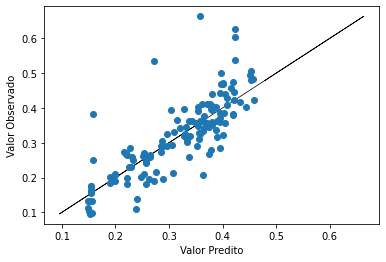

In [74]:
fig, ax = plt.subplots()
ax.scatter(best_dict["y_pred"], best_dict["y_true"], zorder = 2)
ax.plot(best_dict["y_true"], best_dict["y_true"], c = "black", lw = 0.75, zorder = 1)
ax.set_xlabel("Valor Predito")
ax.set_ylabel("Valor Observado")